# Part 0: Import 套件

In [1]:
#下載資料套件
import urllib3
from bs4 import BeautifulSoup

#資料處理套件
import pandas as pd
from datetime import datetime, date

#畫圖套件
import matplotlib.pyplot as plt
%matplotlib inline

# Part 1: 下載期交所30天內選擇權Put/Call比

台灣期貨交易所: 臺指選擇權 Put/Call Ratios 統計表 https://www.taifex.com.tw/cht/3/pcRatio

**注意:查詢區間不可超過30日**

In [2]:
http = urllib3.PoolManager()
url = "https://www.taifex.com.tw/cht/3/pcRatio"
res = http.request(
     'POST',
      url,
      fields={
         'queryStartDate': '2021/06/17',
         'queryEndDate': '2021/07/17'
      }
 )

html_doc = res.data
html_doc

/Users/hou/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


b'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01//EN" "http://www.w3.org/TR/html4/strict.dtd">\r\n\r\n\r\n<head><meta http-equiv="X-UA-Compatible" content="IE=edge"></head>\r\n<html xmlns="http://www.w3.org/1999/xhtml" lang="zh-TW" >\r\n\t\t<head>\r\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\r\n  <link rel="shortcut icon" type="image/x-icon" href="/cht/resources/front/cht/images/favicon.ico" />\r\n  <meta property="og:image" content="https://www.taifex.com.tw/chinese/images/fb_logo.jpg" />\r\n  <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n  <meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n  <title>\xe8\x87\xba\xe7\x81\xa3\xe6\x9c\x9f\xe8\xb2\xa8\xe4\xba\xa4\xe6\x98\x93\xe6\x89\x80-\xe4\xba\xa4\xe6\x98\x93\xe8\xb3\x87\xe8\xa8\x8a-\xe4\xba\xa4\xe6\x98\x93\xe8\xb3\x87\xe8\xa8\x8a-\xe9\x81\xb8\xe6\x93\x87\xe6\xac\x8a-\xe8\x87\xba\xe6\x8c\x87\xe9\x81\xb8\xe6\x93\x87\xe6\xac\x8aPut/Call\xe6\xaf\x94</title>\r\n  \r\n  \r\n  <link rel

In [3]:
soup = BeautifulSoup(html_doc, 'html.parser')
soup

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01//EN" "http://www.w3.org/TR/html4/strict.dtd">

<head><meta content="IE=edge" http-equiv="X-UA-Compatible"/></head>
<html lang="zh-TW" xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<link href="/cht/resources/front/cht/images/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<meta content="https://www.taifex.com.tw/chinese/images/fb_logo.jpg" property="og:image">
<meta content="text/html; charset=utf-8" http-equiv="Content-Type">
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>臺灣期貨交易所-交易資訊-交易資訊-選擇權-臺指選擇權Put/Call比</title>
<link href="/cht/resources/front/cht/css/global.css" rel="stylesheet" type="text/css"/>
<link href="/cht/resources/front/cht/css/content.css" rel="stylesheet" type="text/css"/>
<link href="/cht/resources/front/cht/css/index.css" rel="stylesheet" type="text/css"/>
<link href="/cht/resources/front/cht/css/free.css" rel="stylesheet" type="text/

In [4]:
table = soup.table
table

<table border="0" cellpadding="0" cellspacing="0" width="100%">
<tr>
<table align="center" border="0" cellpadding="0" cellspacing="0" class="table_b" width="400">
<tr>
<td class="link_tit">臺指選擇權(TXO)Put/Call Ratios 統計表</td>
</tr>
<tr>
<td>
<table align="center" border="0" cellpadding="0" cellspacing="0">
<tr>
<td align="right"><label for="queryStartDate">日期(起)：</label></td>
<td align="left">
<input id="queryStartDate" name="queryStartDate" type="text" value="2021/06/17">
</input></td>
</tr>
<tr>
<td align="right"><label for="queryEndDate">日期(迄)：</label></td>
<td align="left">
<input id="queryEndDate" name="queryEndDate" type="text" value="2021/07/17"/>
</td>
</tr>
</table>
</td>
</tr>
<tr class="ft">
<td>
<input class="btn_gray" id="button4" name="button3" onclick="Query1();" type="button" value="查詢"/>
<input class="btn_gray" onclick="download1();" type="button" value="下載"/>
</td>
</tr>
</table>
</tr>
<tr>
<td>
											單位：口
											<table border="0" cellpadding="0" cellspacing="0

In [5]:
df = pd.read_html(str(table))
df

[Empty DataFrame
 Columns: [單位：口  日期 賣權成交量 買權成交量 買賣權成交量比率% 賣權未平倉量 買權未平倉量 買賣權未平倉量比率% 2021/7/16 320,738 372,576 86.09  262,011  288,629 90.78 2021/7/15 290,336 281,480 103.15  244,161  216,101 112.98 2021/7/14 618,929 593,396 104.30  181,969  154,702 117.63 2021/7/13 473,525 412,375 114.83  311,750  289,555 107.67 2021/7/12 375,336 373,294 100.55  291,815  260,798 111.89 2021/7/9 350,941 392,833 89.34  254,110  245,237 103.62 2021/7/8 258,936 250,739 103.27  226,427  198,079 114.31 2021/7/7 581,252 568,923 102.17  167,225  145,454 114.97 2021/7/6 271,086 278,278 97.42  293,707  224,278 130.96 2021/7/5 352,052 275,867 127.62  282,357  189,499 149.00 2021/7/2 201,941 205,882 98.09  237,943  172,809 137.69 2021/7/1 290,118 246,645 117.63  220,504  160,989 136.97 2021/6/30 516,108 434,709 118.72  145,335  119,500 121.62 2021/6/29 346,698 335,629 103.30  264,318  197,579 133.78 2021/6/28 247,328 206,219 119.93  239,074  166,918 143.23 2021/6/25 264,180 235,039 112.40  221,836  153,005 144.99 

In [6]:
pc_ratio = df[3]
pc_ratio

,日期,賣權成交量,買權成交量,買賣權成交量比率%,賣權未平倉量,買權未平倉量,買賣權未平倉量比率%
0,2021/7/16,320738,372576,86.09,262011,288629,90.78
1,2021/7/15,290336,281480,103.15,244161,216101,112.98
2,2021/7/14,618929,593396,104.30,181969,154702,117.63
3,2021/7/13,473525,412375,114.83,311750,289555,107.67
4,2021/7/12,375336,373294,100.55,291815,260798,111.89
5,2021/7/9,350941,392833,89.34,254110,245237,103.62
6,2021/7/8,258936,250739,103.27,226427,198079,114.31
7,2021/7/7,581252,568923,102.17,167225,145454,114.97
8,2021/7/6,271086,278278,97.42,293707,224278,130.96
9,2021/7/5,352052,275867,127.62,282357,189499,149.00


# Part 2: 將下載的個股資料另存成csv檔

In [ ]:
pc_ratio.to_csv("pc_ratio.csv")

# Part 3: 畫出選擇權Put/Call比

/Users/hou/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/hou/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/hou/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


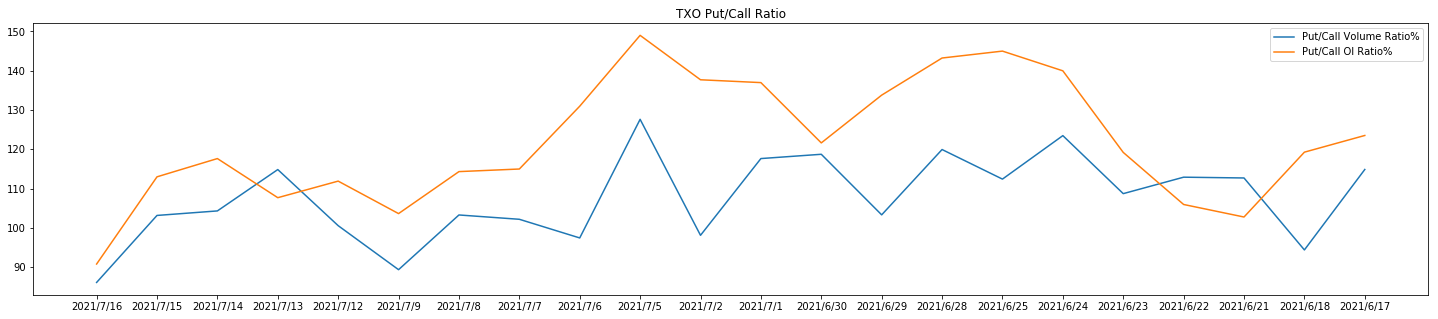

In [7]:
fig = plt.figure(figsize = (25, 5))
plt.title('TXO Put/Call Ratio')

plt.plot(pc_ratio['日期'], pc_ratio['買賣權成交量比率%'])
plt.plot(pc_ratio['日期'], pc_ratio['買賣權未平倉量比率%'])

plt.legend(['Put/Call Volume Ratio%', 'Put/Call OI Ratio%'])

### 資料轉型：把日期從字串(string)換成時間(datetime)

In [8]:
for row in range(pc_ratio.shape[0]):
    date2 = pc_ratio.iloc[row,0].split('/')
    pc_ratio.iloc[row, 0] = datetime(int(date2[0]), int(date2[1]), int(date2[2]))
        
pc_ratio.head(10)

,日期,賣權成交量,買權成交量,買賣權成交量比率%,賣權未平倉量,買權未平倉量,買賣權未平倉量比率%
0,2021-07-16 00:00:00,320738,372576,86.09,262011,288629,90.78
1,2021-07-15 00:00:00,290336,281480,103.15,244161,216101,112.98
2,2021-07-14 00:00:00,618929,593396,104.30,181969,154702,117.63
3,2021-07-13 00:00:00,473525,412375,114.83,311750,289555,107.67
4,2021-07-12 00:00:00,375336,373294,100.55,291815,260798,111.89
5,2021-07-09 00:00:00,350941,392833,89.34,254110,245237,103.62
6,2021-07-08 00:00:00,258936,250739,103.27,226427,198079,114.31
7,2021-07-07 00:00:00,581252,568923,102.17,167225,145454,114.97
8,2021-07-06 00:00:00,271086,278278,97.42,293707,224278,130.96
9,2021-07-05 00:00:00,352052,275867,127.62,282357,189499,149.00


/Users/hou/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/hou/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/hou/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


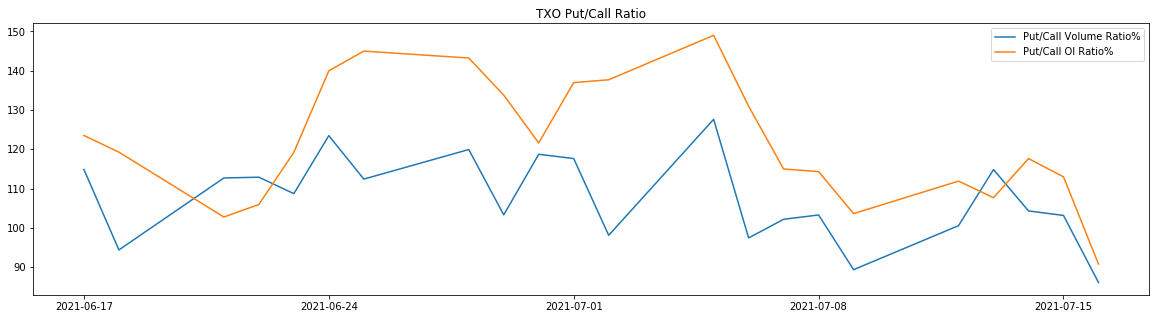

In [9]:
fig = plt.figure(figsize = (20, 5))
plt.title('TXO Put/Call Ratio')

plt.plot(pc_ratio['日期'], pc_ratio['買賣權成交量比率%'])
plt.plot(pc_ratio['日期'], pc_ratio['買賣權未平倉量比率%'])

plt.legend(['Put/Call Volume Ratio%', 'Put/Call OI Ratio%'])